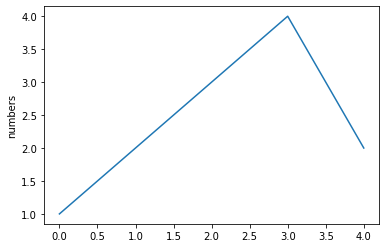

In [ ]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt

#Matplotlib

plt.plot([1, 2, 3, 4, 2])
plt.ylabel('numbers')
plt.show()

In [ ]:
%matplotlib inline

(0.0, 3.0, 0.0, 4.0)

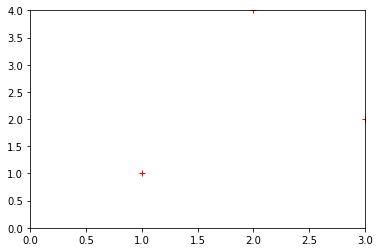

In [ ]:
plt.plot([1, 2, 3], [1, 4, 2], 'r+')
plt.axis([0, 3, 0, 4])

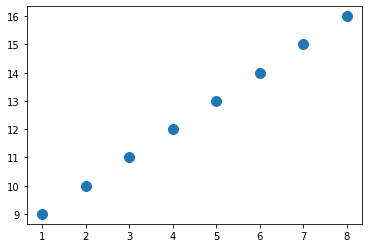

In [ ]:
plt.scatter([1, 2, 3, 4, 5, 6, 7, 8], [9, 10, 11, 12, 13, 14, 15, 16], s = 100)

<BarContainer object of 2 artists>

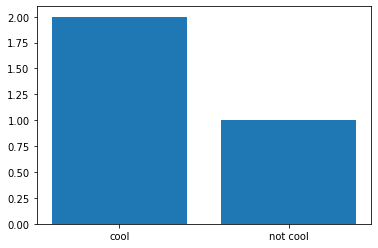

In [ ]:
plt.bar(['cool', 'not cool'], [2, 1])

(array([1., 1.]), array([1. , 1.5, 2. ]), <a list of 2 Patch objects>)

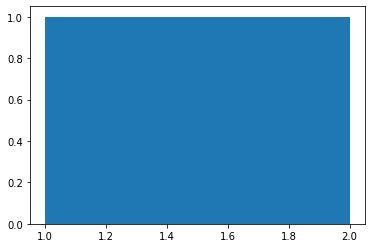

In [ ]:
plt.hist([1, 2], bins = 2)

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Plotly

fig = px.pie(data, values = "Survived", names = "Pclass")
fig.show()

In [ ]:
# Bar char for Embarked

fig = px.bar(data, x = 'Embarked')
fig.show()

In [ ]:
# Men and women survided or not pie chart (4 type)

fig = px.pie(data, values="Survived", names="Sex")
fig.show()

In [ ]:
# Fare hist

fig = px.histogram(data, x="Fare", nbins = 10)
fig.show()

In [ ]:
fig = px.density_heatmap(data, x = "Fare", y = "Age", z = "Survived")
fig.show()

In [ ]:
# miss, mrs, ms -- horizontal bar charts

data["Prefix"] = data.Name.apply(lambda x: x.split(',')[1].split('.')[0])
df = data.Prefix.value_counts().head(5)

fig = px.bar(df, orientation = 'h')
fig.show()

In [ ]:
data["Age_step_5"] = data.Age.fillna(data.Age.median()).apply(lambda x: x//5*5)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Age_step_5
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,35.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,25.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,35.0


In [ ]:
# Heatmap for 
data["fare"] = data.Fare.fillna(data.Age.median()).apply(lambda x: x//5*5 if x < 100 else 100)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Age_step_5,fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,20.0,5.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,35.0,70.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,25.0,5.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,35.0,50.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,35.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,25.0,10.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,15.0,30.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,25.0,20.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,25.0,30.0


In [ ]:
ex = data[['Survived', 'SibSp', 'fare']].groupby(['SibSp', 'fare'], as_index = False).sum()
ex = ex.sort_values(by = 'fare')
ex

,SibSp,fare,Survived
0,0,0.0,1
20,1,5.0,3
54,4,5.0,1
39,2,5.0,0
1,0,5.0,62
21,1,10.0,7
40,2,10.0,0
2,0,10.0,40
3,0,15.0,9
41,2,15.0,4


In [ ]:
pt = pd.pivot_table(ex, values = 'Survived', index = ['SibSp'], columns = 'fare').fillna(0)
pt

fare,0.0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,60.0,65.0,70.0,75.0,80.0,85.0,90.0,100.0
SibSp,,,,,,,,,,,,,,,,,,,,
0,1.0,62.0,40.0,9.0,6.0,24.0,12.0,5.0,0.0,2.0,0.0,10.0,1.0,2.0,1.0,6.0,5.0,3.0,1.0,20.0
1,0.0,3.0,7.0,15.0,8.0,16.0,4.0,3.0,2.0,0.0,10.0,6.0,0.0,3.0,1.0,9.0,3.0,2.0,6.0,14.0
2,0.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


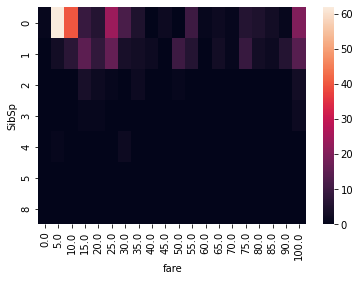

In [ ]:
sns.heatmap(pt)